<a href="https://colab.research.google.com/github/hawk20434/AAB-TEST-research-project/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [ ]:
df = pd.read_csv('bikes_rent.csv')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

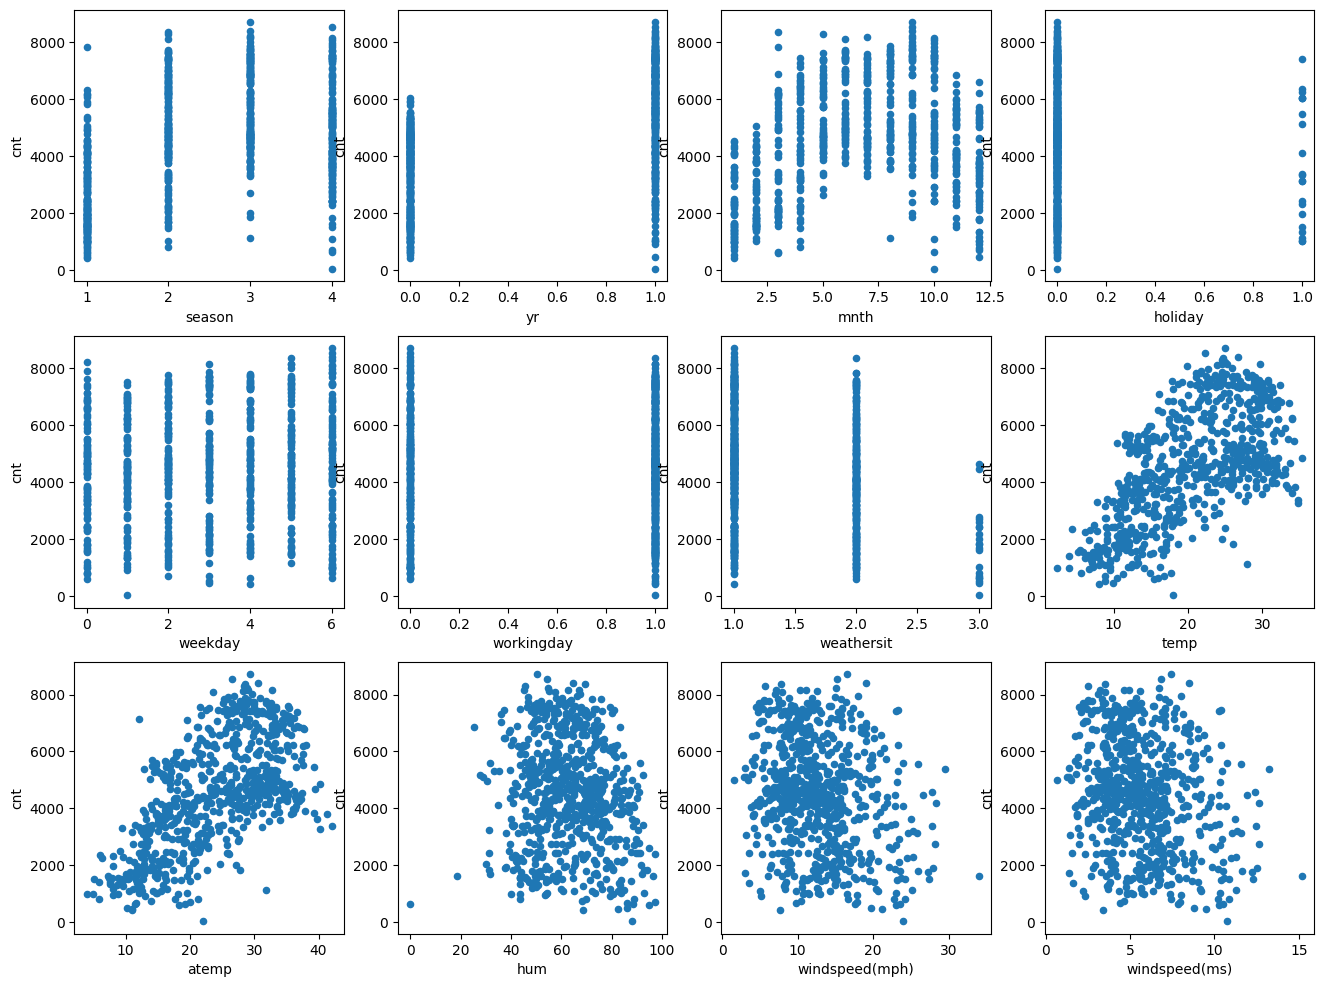

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: из графика видно, что количество прокатов зависит от времени года. В летний период количество прокатов возрастает, в то время как в зимний период оно снижается, что создает форму графика, напоминающую обратную параболу. Этот характер зависимости довольно прост: с изменением месяца меняется температура, и, как следствие, интерес к прокату. Желающих кататься в холодное время года заметно меньше по сравнению с теплым сезоном.

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: atemp: температура по ощущениям в Цельсиях, temp: температура в Цельсиях

<Figure size 1000x600 with 0 Axes>

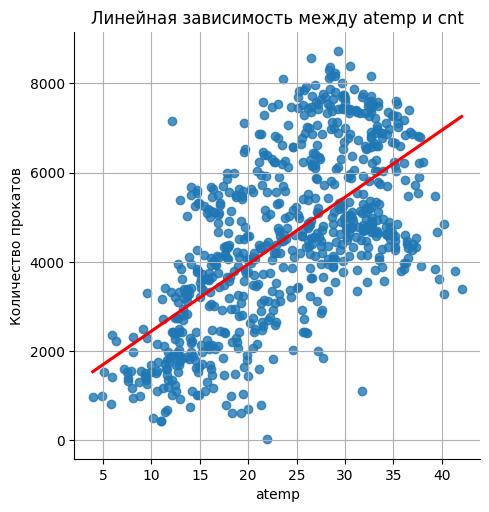

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='atemp', y='cnt', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Линейная зависимость между atemp и cnt')
plt.xlabel('atemp')
plt.ylabel('Количество прокатов')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

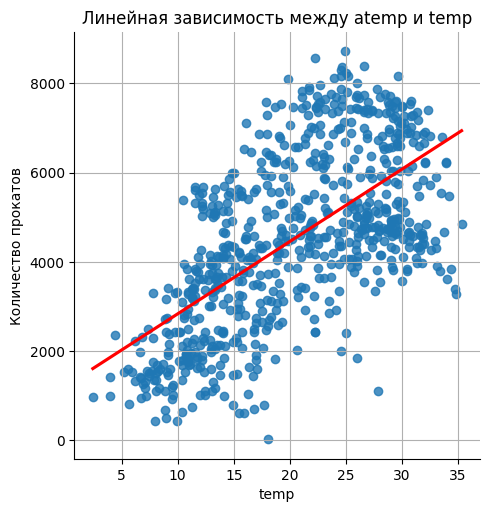

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='temp', y='cnt', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Линейная зависимость между atemp и temp')
plt.xlabel('temp')
plt.ylabel('Количество прокатов')
plt.grid(True)
plt.show()

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: _коррелирует меньше всего (около 4 штуки)_

- workingday(0.06)
- weekday(0.06)
- holiday(0.06)
- hum(0.1)

Коррелирует больше всего:
- atemp(0.63)
- temp(0.62)
- yr(0.56)
- season(0.40)

Дополнение: значение меньше нуля рассматривались как обратная корреляция. Когда одна переменная увеличивается, другая уменьшается, и наоборот.

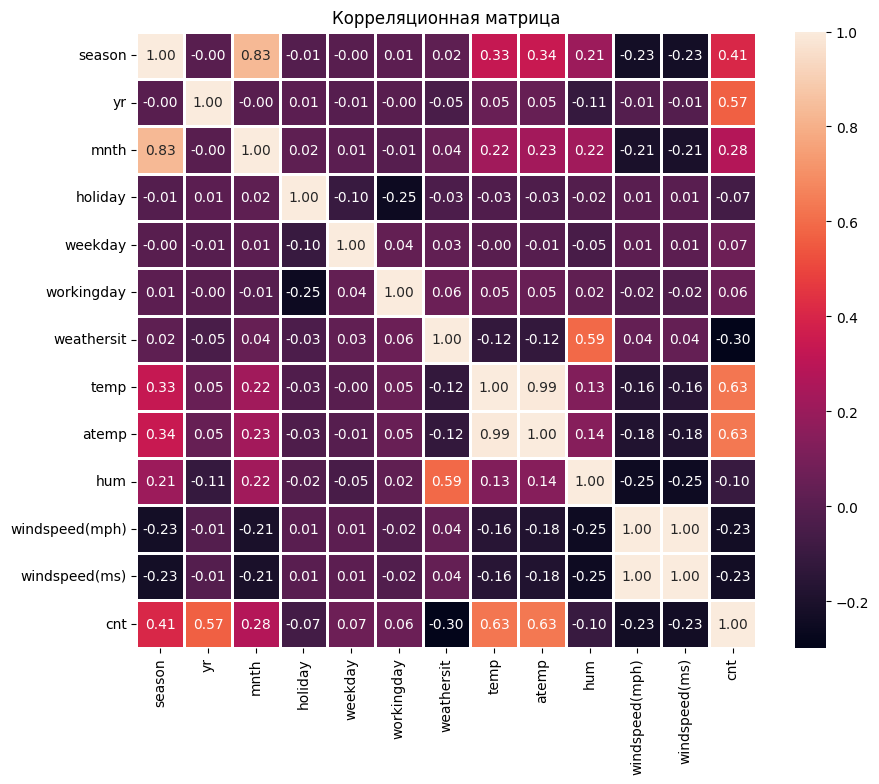

In [ ]:
matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt=".2f", linewidths=1)
plt.title("Корреляционная матрица")
plt.show()

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: большая корреляция, возможна, связана с тем, что количество прокатов велосипедов могло значительно расти с течением времени, поскольку сервис проката мог становиться популярнее и больше людей могли пользоваться им.

In [ ]:
# Сделаем группировку согласно условию, обьеденим по месяцам и годам и сразу посчитаем количество прокатот
month_rents = df.groupby(['yr', 'mnth'])['cnt'].sum()
month_rents.reset_index().head(15)

,yr,mnth,cnt
0,0,1,38189
1,0,2,48215
2,0,3,64045
3,0,4,94870
4,0,5,135821
5,0,6,143512
6,0,7,141341
7,0,8,136691
8,0,9,127418
9,0,10,123511


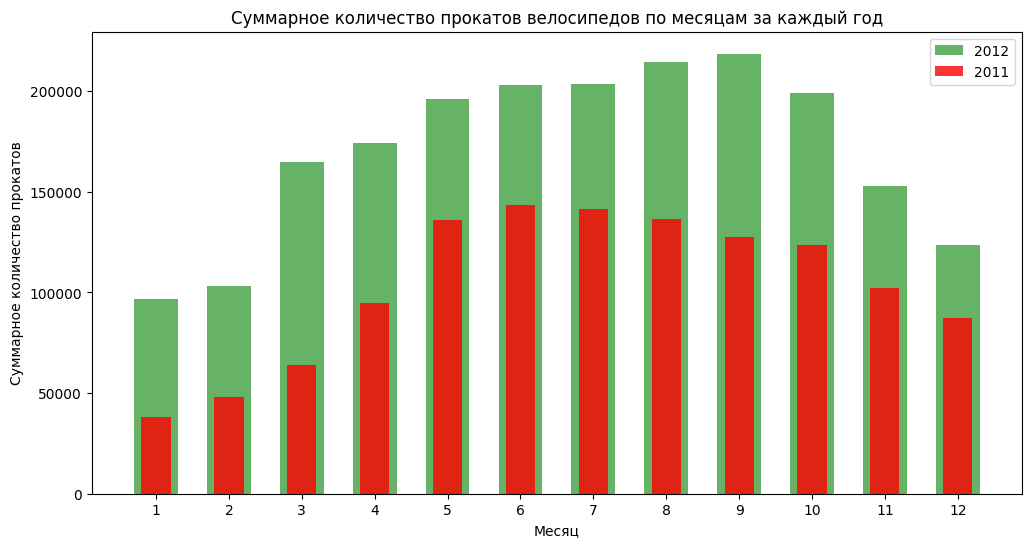

In [ ]:
# Разделим результат на два года исходя из датасета
year_2011 = month_rents[0]
year_2012 = month_rents[1]
months = range(1, 13)

# Построим бар-график по заданию
plt.figure(figsize=(12, 6))
plt.bar(months, year_2012, width=0.6, label='2012', align='center', alpha=0.6, color='green')
plt.bar(months, year_2011, width=0.4, label='2011', align='center', alpha=0.8, color='red')
plt.xticks(months)
plt.xlabel('Месяц')
plt.ylabel('Суммарное количество прокатов')
plt.title('Суммарное количество прокатов велосипедов по месяцам за каждый год')
plt.legend(loc='upper right')
plt.show()

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: на основе того, что в датасете наблюдается равномерное распределение количества арендованных велосипедов в течение недели, можно сделать следующие предположения:

- Спрос на велосипеды стабилен в течение недели. Возможно, анализируемый период был характеризован отсутствием значительных колебаний спроса на аренду велосипедов в зависимости от дня недели(зависит от страны где проходило исследование).
- Отсутствие сезонных вариаций по дням недели. Возможно, датасет был собран в условиях, когда сезонные факторы, такие как погода или праздники, не оказывали существенного влияния на спрос на велосипеды в разные дни недели. Это может означать, что велосипеды арендовались в течение года примерно одинаково, независимо от сезона(об этом нам говорит второй график).
    
Ответ: равномерное (однородное) распределение

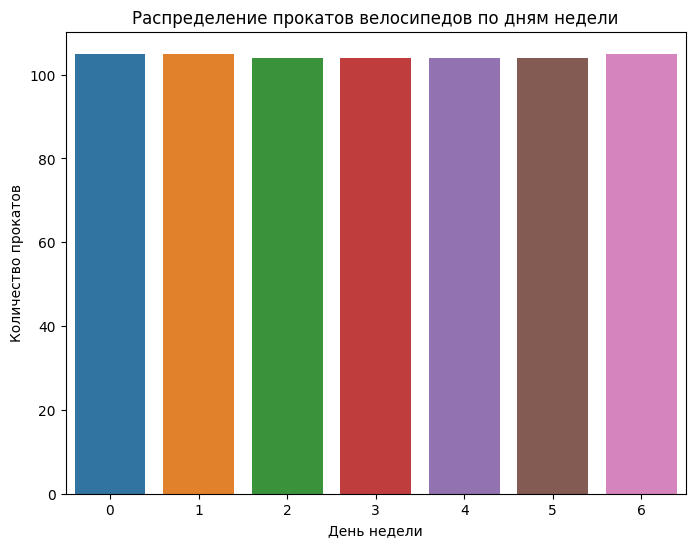

In [ ]:
# Построим countplot для признака 'weekday'.
# График выглядит не стандартно, в будние дни количество прокатов не падает, необходимо найти причину этому
plt.figure(figsize=(8, 6))
sns.countplot(x='weekday', data = df)
plt.title('Распределение прокатов велосипедов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество прокатов')
plt.show()

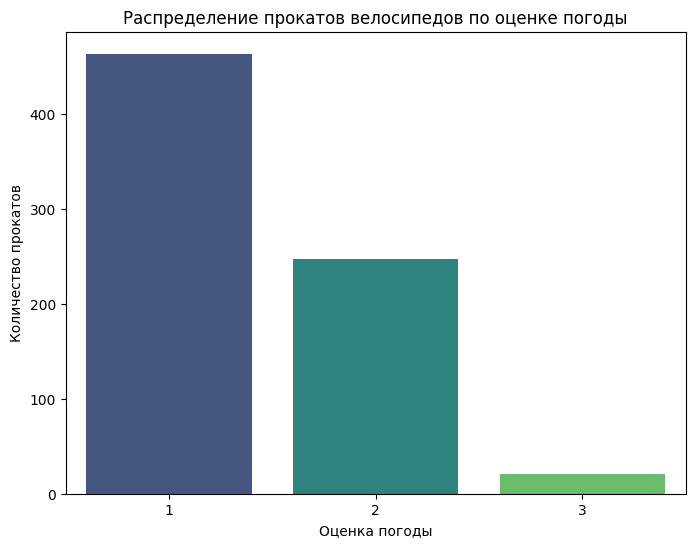

In [ ]:
# Построим countplot для признака 'weathersit'
plt.figure(figsize=(8, 6))
sns.countplot(x='weathersit', data=df, palette='viridis')
plt.title('Распределение прокатов велосипедов по оценке погоды')
plt.xlabel('Оценка погоды')
plt.ylabel('Количество прокатов')
plt.show()

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: около 4000 тыс

Ответ: Нормальное (Гауссово) распределение

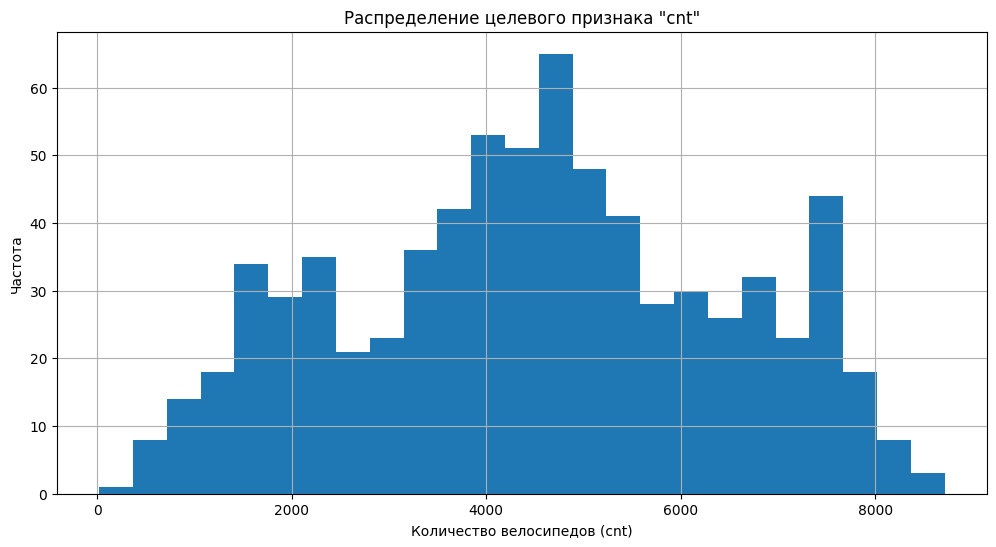

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['cnt'], bins=25)
plt.title('Распределение целевого признака "cnt"')
plt.xlabel('Количество велосипедов (cnt)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: из графика видно небольшое смещение ощущения температуры и его фактического значения. В остальное оба распределения выглядят логичны. Из более детального просмотра смущают различия в +10 градусов. Напрмиер: температура фактическая была 35 градусов, при этом по ощущениям она могла сосатвлять более 40 градусов. Возможно зависит от географического положения где собирали данные для данных.

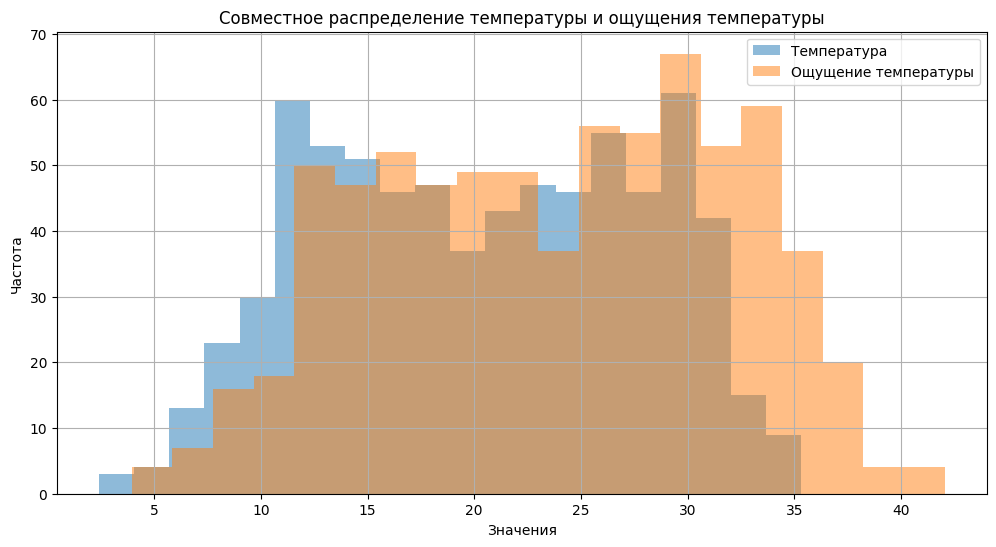

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['temp'], bins=20, alpha=0.5, label='Температура')
plt.hist(df['atemp'], bins=20, alpha=0.5, label='Ощущение температуры')
plt.title('Совместное распределение температуры и ощущения температуры')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(True)
plt.legend()
plt.show()

## 7. Ящик с усами

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: в данном аспекте, может быть множество причин возникновения такой ситуации, как мне кажется веротяны след причины:

- Погодные условия. В некоторые месяцы года погода более благоприятна для прогулок на велосипеде, и это может стимулировать больше прокатов в выходные дни.
- Сезон.В некоторые сезоны, такие как лето, количество людей, желающих воспользоваться велосипедами в выходные дни, может увеличиваться.
- Праздники и выходные дни. Праздники и выходные дни могут способствовать увеличению активности проката в выходные дни.
- Спортивные мероприятия. Наличие спортивных мероприятий или событий в выходные дни может способствовать увеличению проката велосипедов.

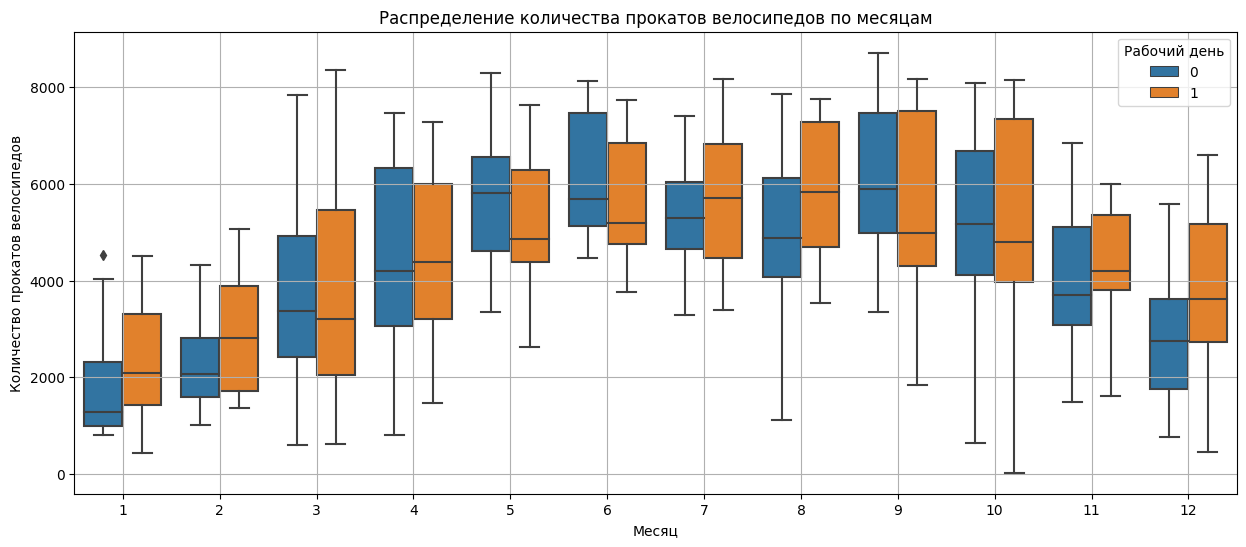

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='mnth', y='cnt', hue='workingday', data=df)
plt.title('Распределение количества прокатов велосипедов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество прокатов велосипедов')
plt.grid(True)
plt.legend(title='Рабочий день')
plt.show()

## 8. Хитрый вопрос

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: с практической точки зрения, это утверждение может быть верно и влиять на количество прокатов.
После поиска дополнительной информации, было обнаружен особый индекс которые имеет формулу расчета, которая может быть использована в данном случае:

Исходя из формулы, расчитаем новый столбец с учетом ветра и сравним новый стобец с фактической температурой в тот день.

Исходя из графика можно увидеть отклонение фактического значения и то который чувствует человек. На графике только в некоторые периоды наблюдались такие изменения и крайне незначительные, поэтому можно утверждать что данное предположение не верно.

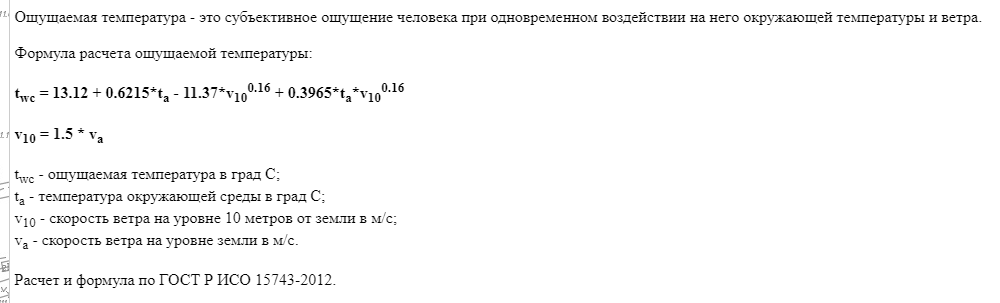

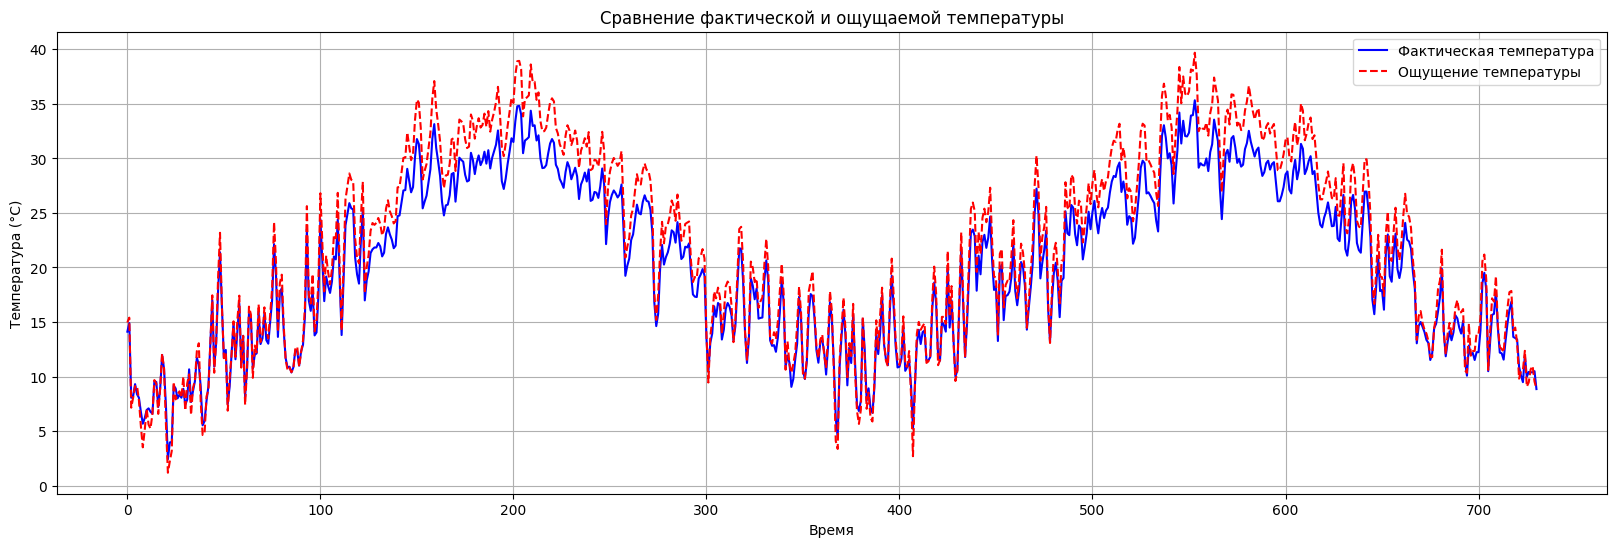

In [ ]:
# Используем формулу и создадим новый столбец
df['Wind_C'] = 13.12 + 0.6215 * df['temp'] - 11.37 * df['windspeed(ms)'] ** 0.16 + 0.3965 * df['temp'] * (df['windspeed(ms)'] * 1.5) ** 0.16

plt.figure(figsize=(20, 6))
plt.plot(df['temp'], label='Фактическая температура', linestyle='-', color='blue')
plt.plot(df['Wind_C'], label='Ощущение температуры', linestyle='--', color='red')
plt.title('Сравнение фактической и ощущаемой температуры')
plt.xlabel('Время')
plt.ylabel('Температура (°C)')
plt.legend()
plt.grid(True)
plt.show()